In [1]:
import os
from glob import glob

import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [2]:
data_paths = glob('data/mnist_png/training/0/*.png')
data_paths[0]

'data/mnist_png/training/0/16585.png'

In [3]:
path = data_paths[0]
path

'data/mnist_png/training/0/16585.png'

In [4]:
#data load
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)

In [5]:
image.shape

TensorShape([28, 28, 1])

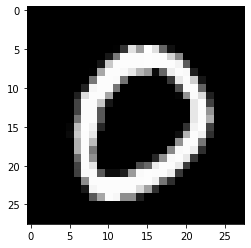

In [6]:
plt.imshow(image[:,:,0],'gray')
plt.show()

In [7]:
# data generator
datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True
)

In [8]:
image.shape

TensorShape([28, 28, 1])

In [9]:
inputs = image[tf.newaxis,...]
inputs.shape

TensorShape([1, 28, 28, 1])

In [10]:
image = next(iter(datagen.flow(inputs)))
image.shape

(1, 28, 28, 1)

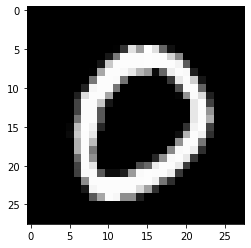

In [11]:
plt.imshow(inputs[0,:,:,0],'gray')
plt.show()

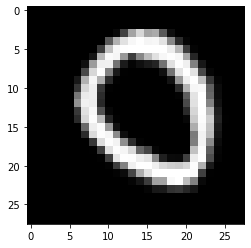

In [12]:
plt.imshow(image[0,:,:,0],'gray')
plt.show()

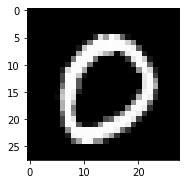

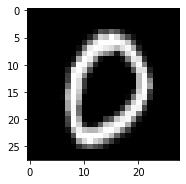

In [13]:
datagen = ImageDataGenerator(
    zoom_range=0.3,
#    height_shift_range=0.,
)
outputs = next(iter(datagen.flow(inputs)))

plt.subplot(121)
plt.imshow(inputs[0,:,:,0],'gray')
plt.show()

plt.subplot(122)
plt.imshow(outputs[0,:,:,0],'gray')
plt.show()

In [14]:
# hyperparametor

eppchs = 10
batch_size =32

learning_rate = 0.001
dropout_rate = 0.7

input_shape = (28,28,1)
num_classes = 10

In [15]:
# 스스로 label이랑 이미지 load하는 방법

os.listdir('data/mnist_png/training')

['9', '0', '7', '6', '1', '8', '4', '3', '2', '5']

In [16]:
os.listdir('data/cifar')

['test', 'labels.txt', 'train']

In [18]:
train_dir = 'data/mnist_png/training'
test_dir = 'data/mnist_png/testing'

In [23]:
len(train_dir), test_dir[]

(23, 'a')

In [60]:
train_datagen = ImageDataGenerator(
    rescale = 1./255.,
    width_shift_range = 0.3,
    zoom_range = 0.3,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(
    rescale = 1./255.
)

In [61]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = input_shape[:2],
    batch_size = batch_size,
    color_mode = 'grayscale',
    class_mode = 'categorical'
)

Found 60000 images belonging to 10 classes.


In [62]:
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = input_shape[:2],
    batch_size = batch_size,
    color_mode = 'grayscale',
    class_mode = 'categorical'
)

Found 10000 images belonging to 10 classes.


In [64]:
inputs = layers.Input(shape=input_shape)

# feature extration
net = layers.Conv2D(32,3,padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32,3,padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Conv2D(32,3,padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32,3,padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)
net = layers.Dropout(0.25)(net)

#fully connected
net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.25)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='CNN')

In [65]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [67]:
#training (generator로 넣을 것이기에 fit_generator사용)
model.fit_generator(
    train_generator,
    steps_per_epoch = len(train_generator),
    epochs=1,
    validation_data=validation_generator,
    validation_steps = len(validation_generator)
)

1875/1875 [==============================] - 115s 61ms/step - loss: 0.4601 - accuracy: 0.8491 - val_loss: 0.0894 - val_accuracy: 0.9693
